# Logical T state Encoded by Steane


In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error, ReadoutError
from qiskit.visualization import plot_histogram
import typing


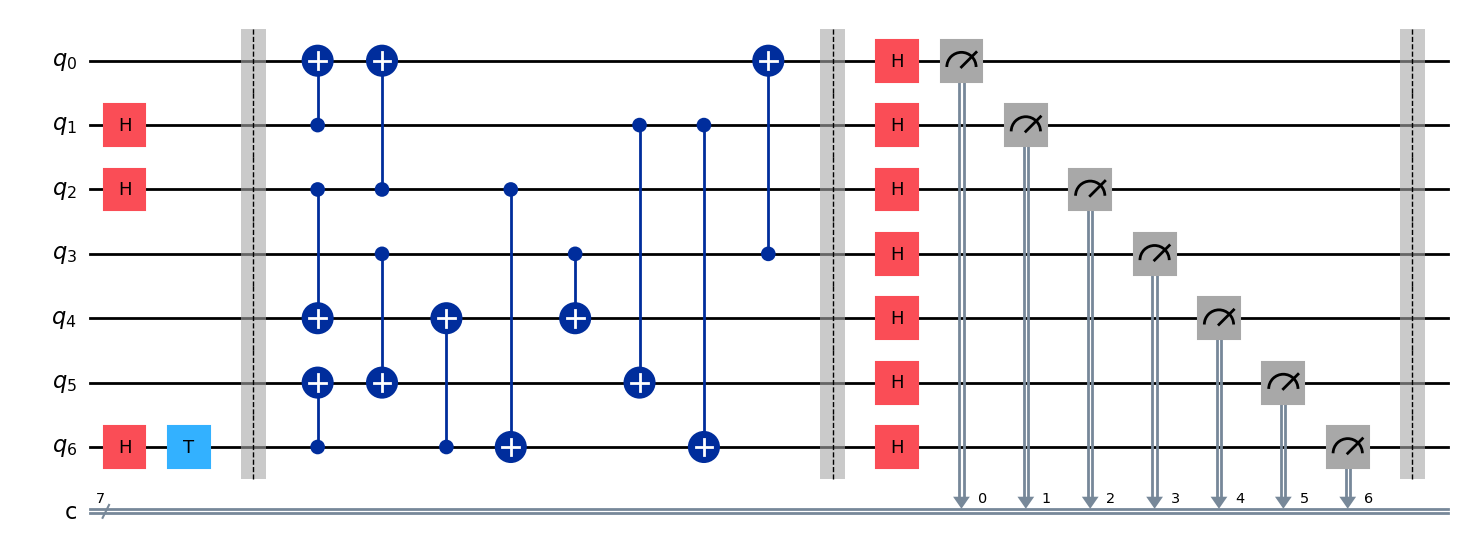

In [3]:

def steane_encoding(qc: QuantumCircuit):
    for i in range(1, 3):
        qc.h(i)

    qc.h(6)
    qc.t(6)
    qc.barrier()

    qc.cx(1, 0)
    qc.cx(2, 4)
    qc.cx(6, 5)

    qc.cx(2,0)
    qc.cx(3,5)

    qc.cx(6,4)
    qc.cx(2,6)

    qc.cx(3,4)

    qc.cx(1,5)
    qc.cx(1,6)

    qc.cx(3 ,0)

    qc.barrier()

    for i in range(0, 7):
        qc.h(i)
        qc.measure(i,i)
    qc.barrier()
            

qc_713 = QuantumCircuit(7,7)
steane_encoding(qc_713)
# for i in range(0, 7):
#         qc_713.measure(i,i)
qc_713.draw('mpl')



# Simulate


In [4]:
backend = AerSimulator(method='statevector')

job = backend.run(qc_713,shots=1000)
result = job.result()
print(result)

Result(backend_name='aer_simulator_statevector', backend_version='0.14.2', qobj_id='', job_id='1cae1582-ff71-4816-a244-61b8544904bb', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x64': 49, '0x52': 56, '0x63': 60, '0x5a': 53, '0x39': 62, '0x6b': 56, '0xf': 59, '0x14': 10, '0x6c': 55, '0x22': 12, '0x3e': 54, '0x55': 48, '0x8': 41, '0x7f': 10, '0x1b': 12, '0x46': 4, '0x0': 58, '0x31': 49, '0x77': 4, '0x1c': 9, '0x78': 9, '0x5d': 46, '0x4e': 7, '0x70': 6, '0x2a': 6, '0x36': 61, '0x41': 9, '0x7': 50, '0x13': 15, '0x2d': 10, '0x49': 11, '0x25': 9}), header=QobjExperimentHeader(creg_sizes=[['c', 7]], global_phase=0.0, memory_slots=7, n_qubits=7, name='circuit-166', qreg_sizes=[['q', 7]], metadata={}), status=DONE, seed_simulator=2031811581, metadata={'batched_shots_optimization': False, 'required_memory_mb': 1, 'method': 'statevector', 'active_input_qubits': [0, 1, 2, 3, 4, 5, 6], 'device': 'CPU', 'remapped_qubits': False,

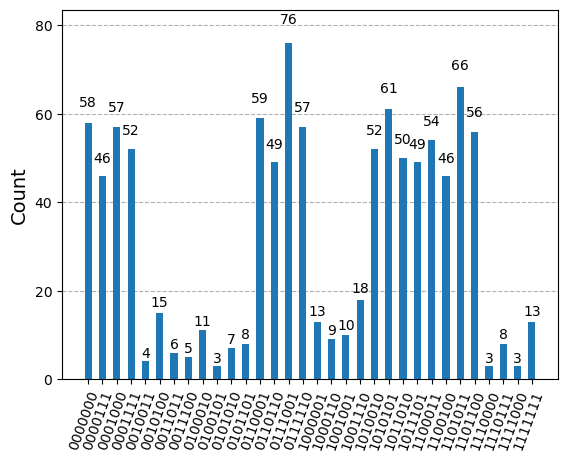

In [5]:
result = AerSimulator().run(qc_713).result()
statistics = result.get_counts()

display(plot_histogram(statistics)) 
# print(result)

# Combining Steane Code and small MSD

In [6]:
qc_3_713 = QuantumCircuit(21,21)

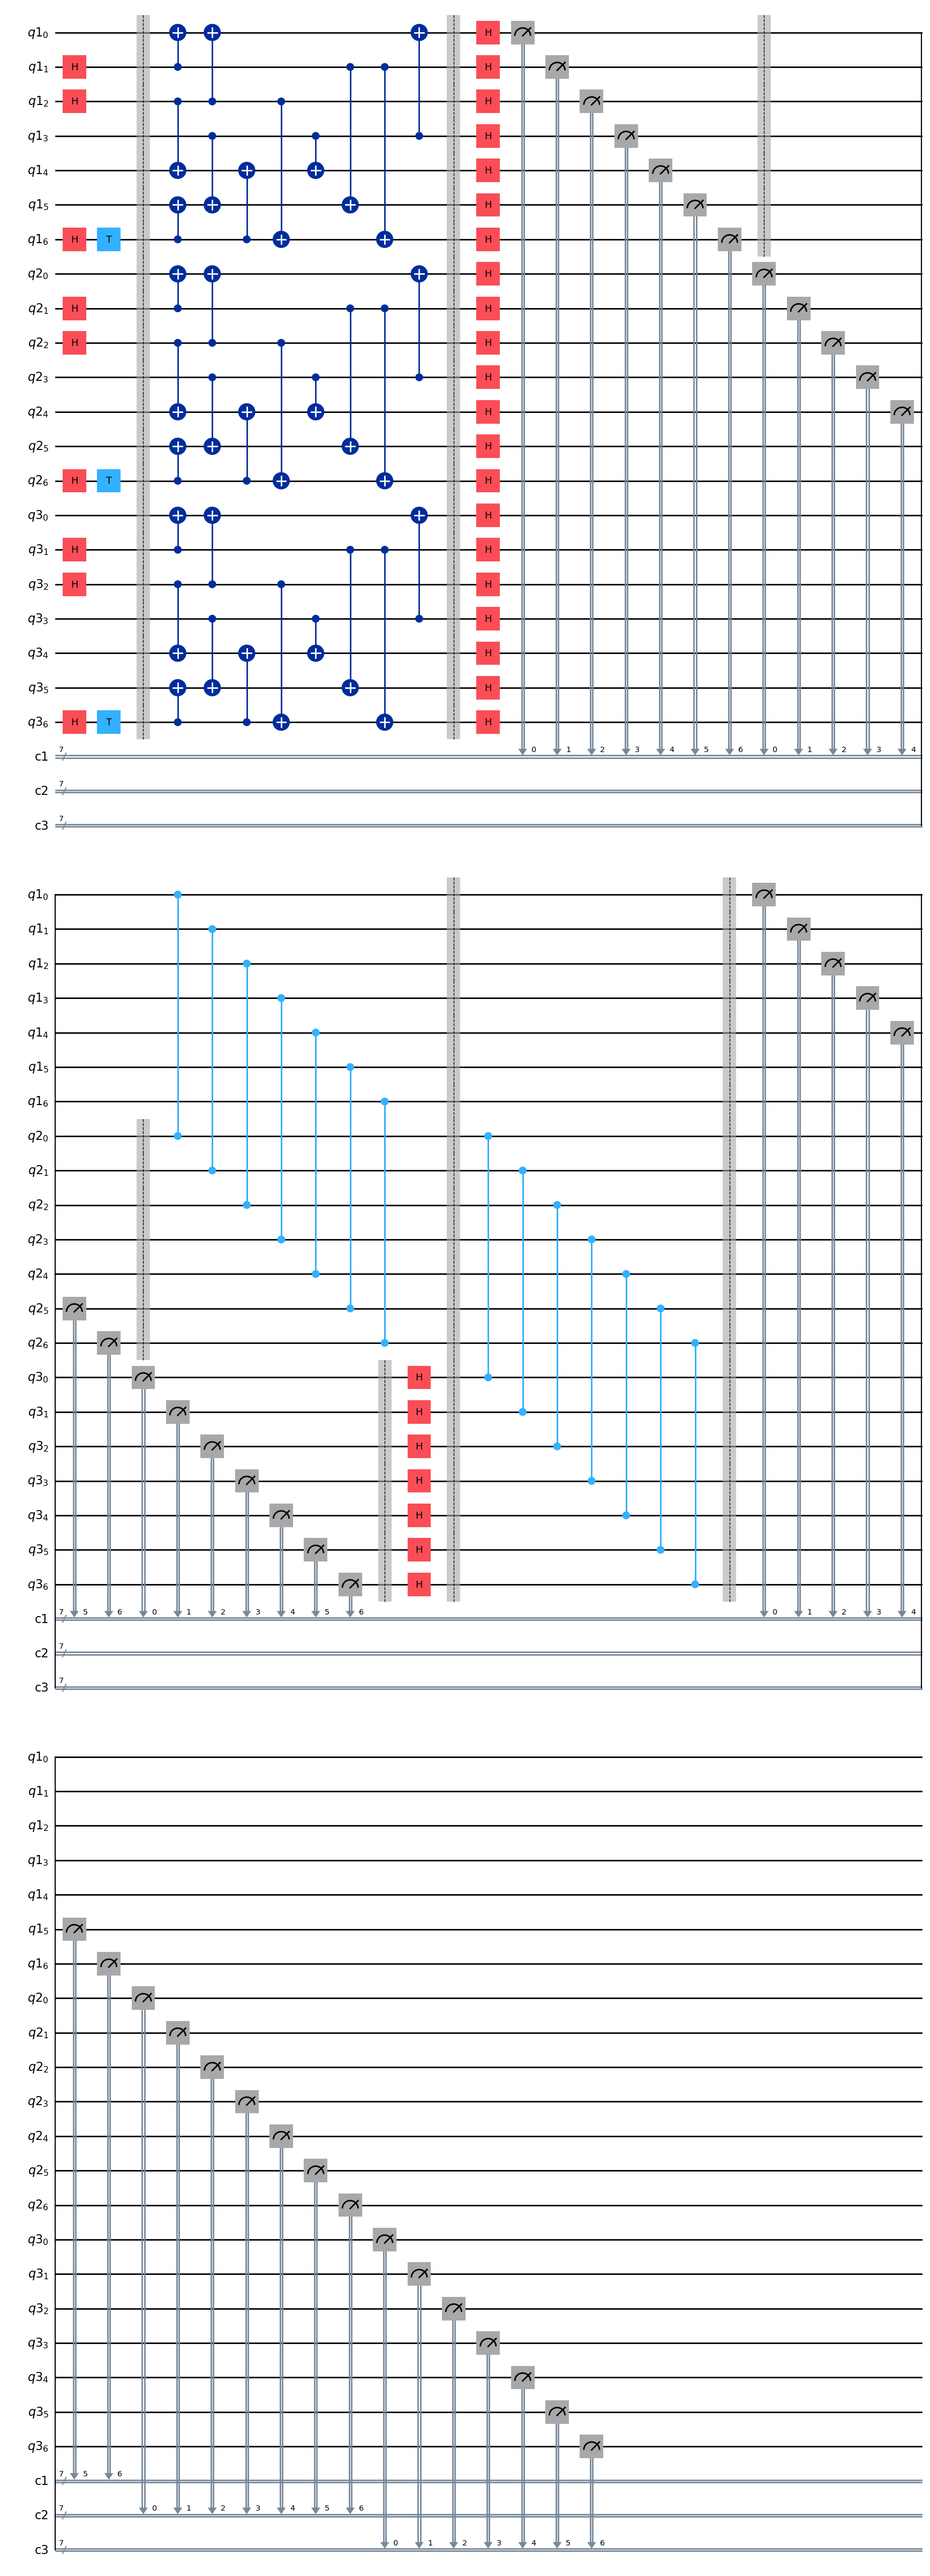

In [7]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# Create three separate circuits with their own registers
qr_1_713 = QuantumRegister(7, 'q1')
cr_1_713 = ClassicalRegister(7, 'c1')
qc_1_713 = QuantumCircuit(qr_1_713, cr_1_713)
steane_encoding(qc_1_713,)


qr_2_713 = QuantumRegister(7, 'q2')
cr_2_713 = ClassicalRegister(7, 'c2')
qc_2_713 = QuantumCircuit(qr_2_713, cr_2_713)
steane_encoding(qc_2_713)

qr_3_713 = QuantumRegister(7, 'q3')
cr_3_713 = ClassicalRegister(7, 'c3')
qc_3_713 = QuantumCircuit(qr_3_713, cr_3_713)
steane_encoding(qc_3_713)

# Create a new combined circuit with all qubits
combined_qc = QuantumCircuit(qr_1_713, cr_1_713, qr_2_713, cr_2_713, qr_3_713, cr_3_713)

# Compose each circuit into the combined one
combined_qc.compose(qc_1_713, qubits=qr_1_713, inplace=True)
combined_qc.compose(qc_2_713, qubits=qr_2_713, inplace=True)
combined_qc.compose(qc_3_713, qubits=qr_3_713, inplace=True)

# print(combined_qc)
# print("Total number of qubits:", combined_qc.num_qubits)

#combined_qc.draw('mpl')



for i in range(0,7):
    combined_qc.cz(i, i + 7)
    combined_qc.h(i + 14)

combined_qc.barrier()

for i in range(0,7):
    combined_qc.cz(i + 7, i + 14)

combined_qc.barrier()

#combined_qc.draw('mpl')

for i in range(0, 21):
    combined_qc.measure(i,i)

combined_qc.draw('mpl')

#qc_3_713.draw('mpl()')

# for i in range(0, 21):
#         qc_3_713.measure(i,i)
# qc_3_713.draw('mpl')

This appears to be a monstrosity. Let us turn some of these things into blocks


In [11]:
steane_enc_block = QuantumCircuit(7, 7, name="steane_block")
for i in range(1, 3):
    steane_enc_block.h(i)

steane_enc_block.h(6)
steane_enc_block.t(6)
steane_enc_block.barrier()

steane_enc_block.cx(1, 0)
steane_enc_block.cx(2, 4)
steane_enc_block.cx(6, 5)

steane_enc_block.cx(2,0)
steane_enc_block.cx(3,5)

steane_enc_block.cx(6,4)
steane_enc_block.cx(2,6)

steane_enc_block.cx(3,4)

steane_enc_block.cx(1,5)
steane_enc_block.cx(1,6)

steane_enc_block.cx(3 ,0)

steane_enc_block.barrier()

for i in range(0, 7):
    steane_enc_block.h(i)
    steane_enc_block.measure(i,i)
steane_enc_block.barrier()

# convert to instruction
steane_block_instr = steane_enc_block.to_instruction()



In [ ]:
# applies h to 7 qubits 

h_block = QuantumCircuit(7, 7, name="h_block")
for i in range(0, 7):
    h_block.h(i)

# convert to instruction
h_block_instr = h_block.to_instruction()


In [ ]:
# applies cz to 7 qubits

cz_block = QuantumCircuit(14, 14, name="cz_block")
for i in range(0, 7):
    cz_block.cz(i, i + 7)

# convert to instruction
cz_block_instr = cz_block.to_instruction()

In [22]:
# measures all 21 qubits 

measure_block = QuantumCircuit(21, 21, name="measure_block")
for i in range(0, 21):
    measure_block.measure(i, i)

# convert to instruction
measure_block_instr = measure_block.to_instruction()

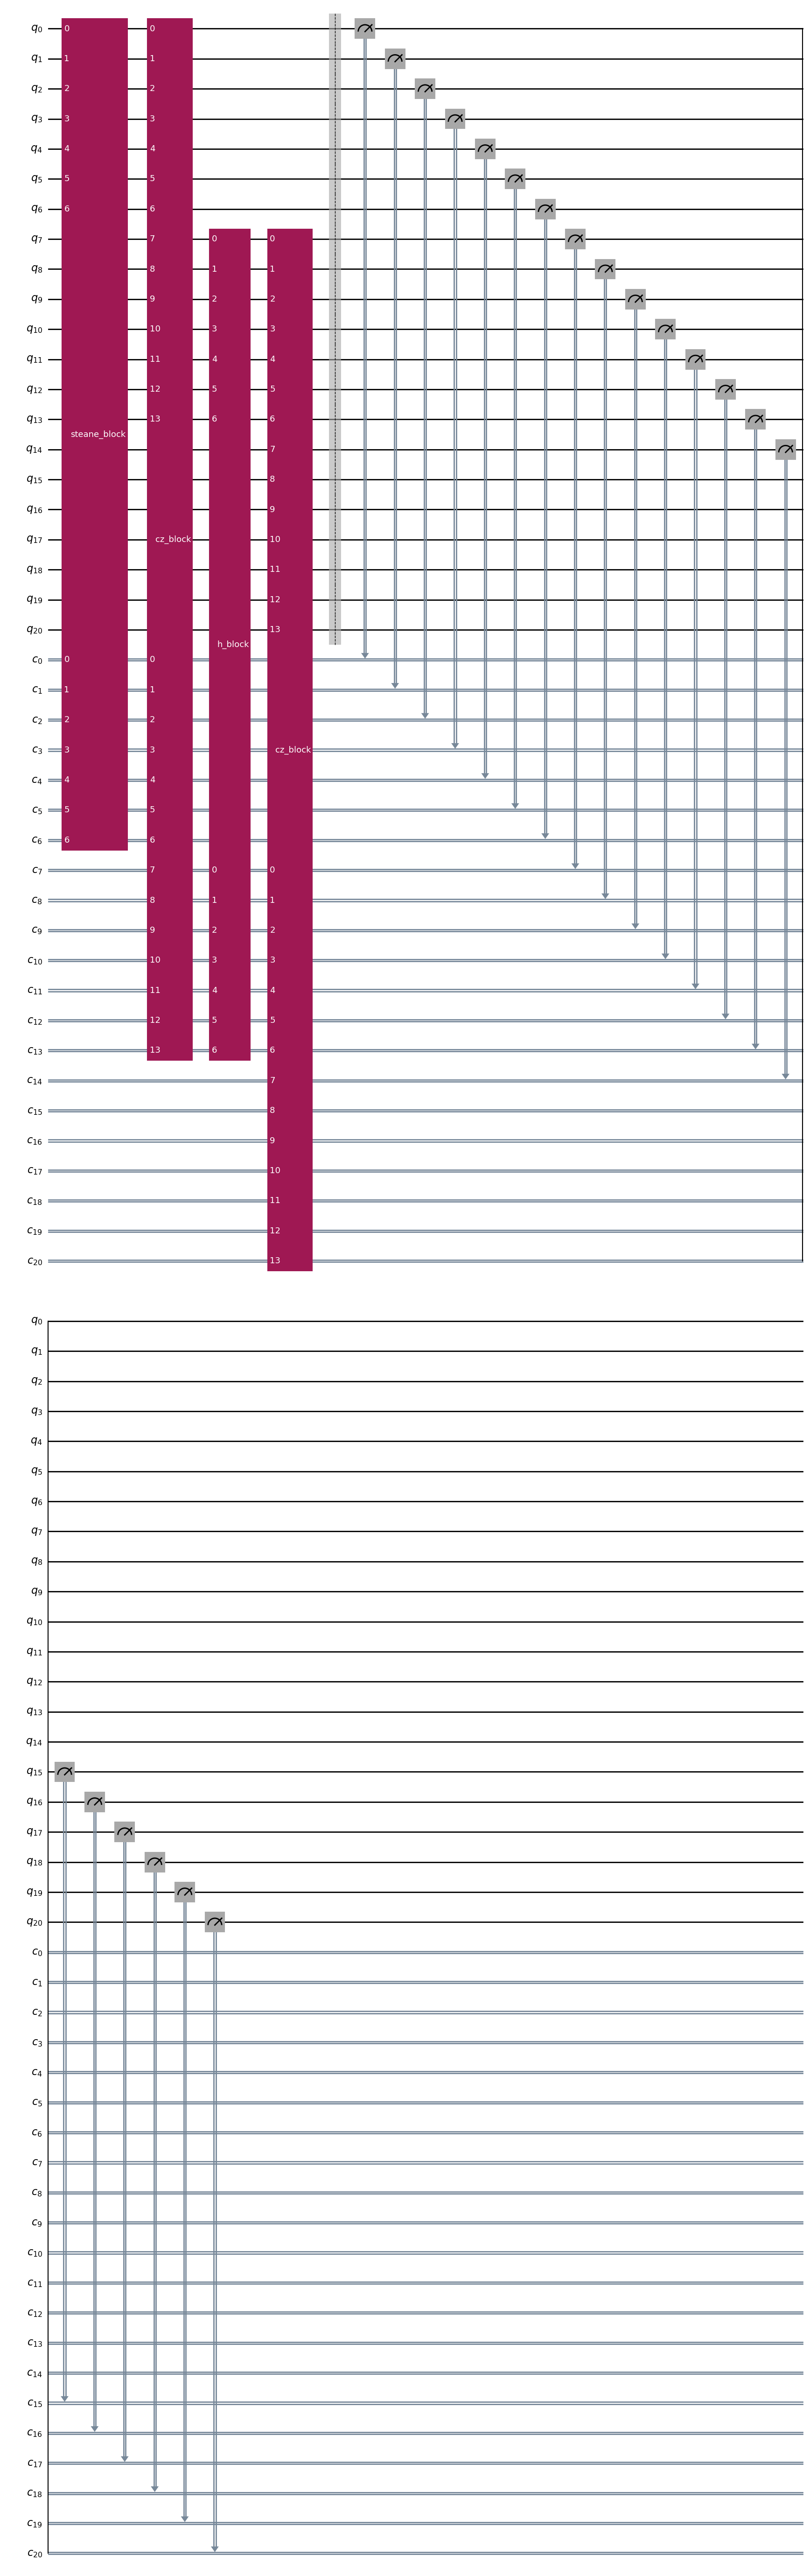

In [24]:
# Create a main circuit with 4 qubits
qc_3_713 = QuantumCircuit(21,21)

# Use the block on qubits 0 & 1
qc_3_713.append(steane_block_instr, range(0,7), range(0,7))
qc_3_713.append(cz_block_instr, range(0,14), range(0,14))
qc_3_713.append(h_block_instr, range(7,14), range(7,14))
qc_3_713.append(cz_block_instr, range(7,21), range(7,21))
# qc_3_713.append(measure_block_instr, range(0,21), range(0,21))

qc_3_713.barrier()

for i in range(0, 21):
    qc_3_713.measure(i, i)



qc_3_713.draw('mpl')

AerError: 'unknown instruction: steane_block'

In [34]:
from qiskit_aer import Aer
from qiskit import transpile
from qiskit_aer.primitives import Sampler

In [ ]:
# Transpile for simulator backend
simulator = Aer.get_backend('qasm_simulator')
steane_t = transpile(qc_3_713, simulator)


In [ ]:

sampler = Sampler()
job = sampler.run(steane_t)
quasi = result.quasi_dists[0]

plot_histogram(quasi)





# add Noise to Steane code MSD

In [ ]:
noise_model = NoiseModel()

noise_model.add_all_qubit_quantum_error(depolarizing_error(0.01,1), ['h'])
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.01,2),['cz'])

In [ ]:
noisy_sampler = Sampler(noise_model=noise_model)
job = noisy_sampler.run(steane_t)
noisy_quasi = result.quasi_dists[0]

plot_histogram(noisy_quasi)

display(plot_histogram(statistics)) 

TypeError: Sampler.__init__() got an unexpected keyword argument 'noise_model'